![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


## Investigation

In [2]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [3]:
penguins_df = pd.get_dummies(penguins_df, columns=['sex'])
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


In [4]:
scaler = StandardScaler()
scaled_penguins_df = scaler.fit_transform(penguins_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])
scaled_penguins_df = pd.DataFrame(scaled_penguins_df, columns=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])
penguins_df = penguins_df.drop(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], axis=1)
penguins_df = pd.concat([penguins_df, scaled_penguins_df], axis=1)
penguins_df.head()

,sex_FEMALE,sex_MALE,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,1,-0.903906,0.790360,-1.425342,-0.566948
1,1,0,-0.830434,0.126187,-1.068577,-0.504847
2,1,0,-0.683490,0.432728,-0.426399,-1.187953
3,1,0,-1.344738,1.096901,-0.569105,-0.939551
4,0,1,-0.867170,1.761074,-0.783164,-0.691149


Number of clusters

In [5]:
inertia = []
for i in range(1,10):
  cluster = KMeans(n_clusters=i, n_init = 'auto', random_state=42).fit(penguins_df)
  inertia.append(cluster.inertia_)

print(inertia)

[1493.9939759036145, 715.8586871250685, 510.56231938863175, 404.5246430691112, 271.18634026042594, 254.44426548805933, 199.07461800706835, 191.19896879721352, 183.83207314140725]


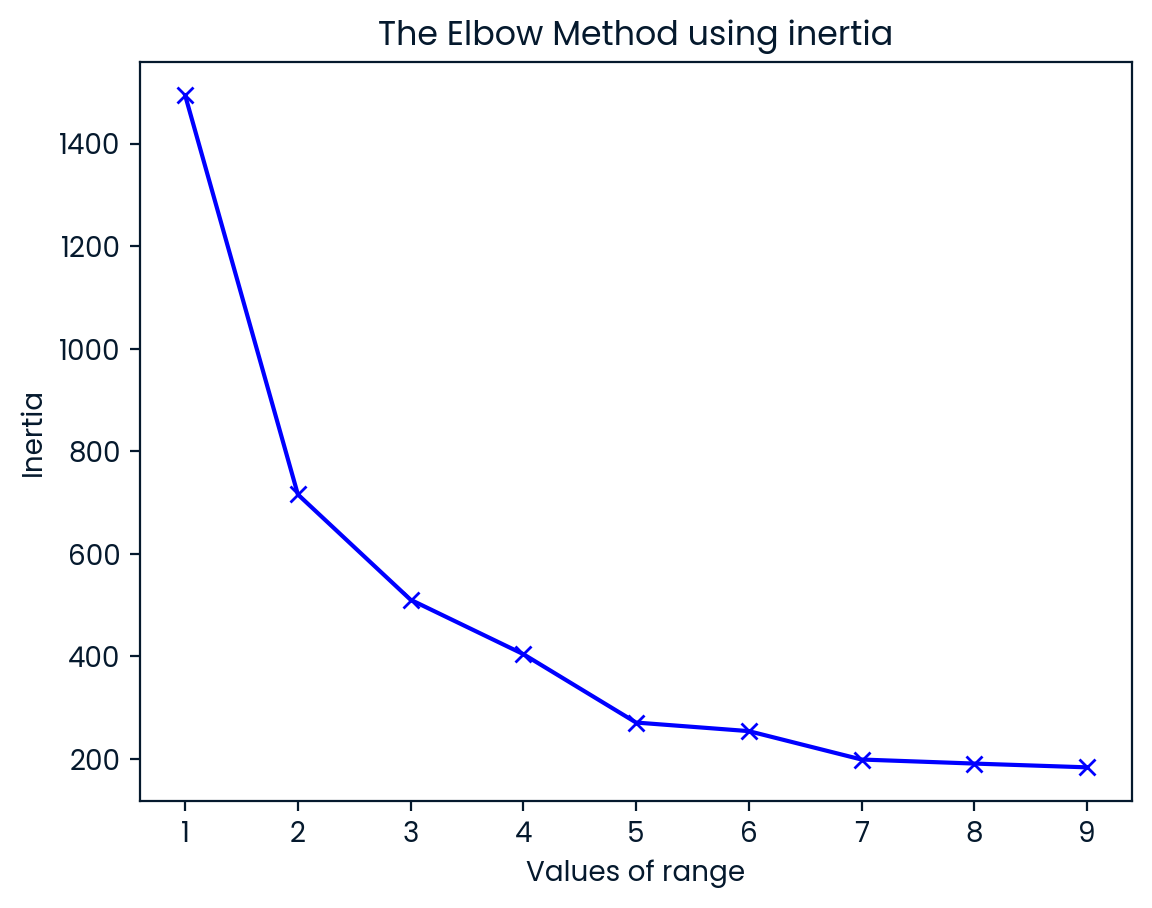

In [6]:
plt.plot(range(1, 10), inertia, 'bx-')
plt.xlabel('Values of range')
plt.ylabel('Inertia')
plt.title('The Elbow Method using inertia')
plt.show()

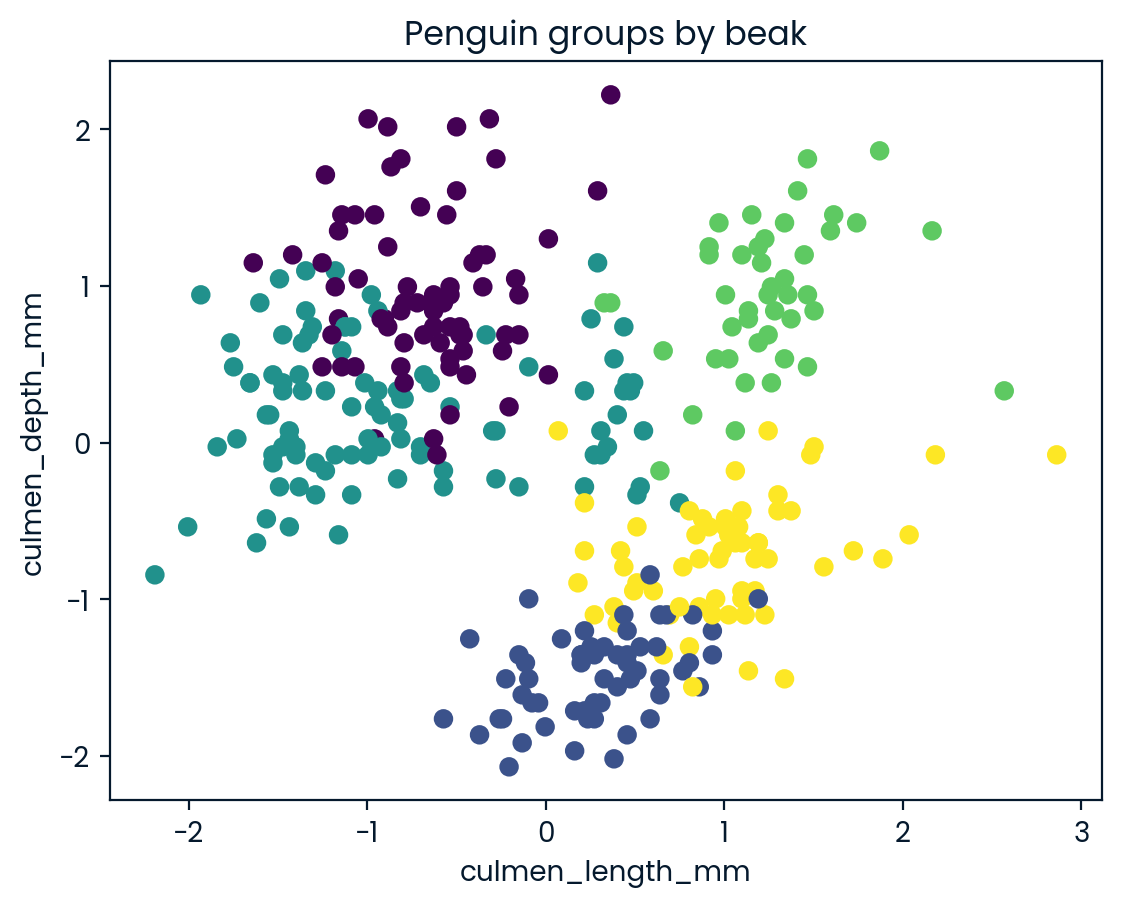

In [7]:
kmeans=KMeans(n_clusters=5, n_init = 'auto', random_state=42).fit(penguins_df)
kmeans.fit(penguins_df)

plt.scatter(penguins_df['culmen_length_mm'], penguins_df['culmen_depth_mm'], c=kmeans.labels_) 
plt.xlabel('culmen_length_mm')
plt.ylabel('culmen_depth_mm')
plt.title('Penguin groups by beak')
plt.show()

In [8]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_df['label'] = kmeans.labels_
penguins_df.head()

,sex_FEMALE,sex_MALE,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,label
0,0,1,-0.903906,0.790360,-1.425342,-0.566948,0
1,1,0,-0.830434,0.126187,-1.068577,-0.504847,2
2,1,0,-0.683490,0.432728,-0.426399,-1.187953,2
3,1,0,-1.344738,1.096901,-0.569105,-0.939551,2
4,0,1,-0.867170,1.761074,-0.783164,-0.691149,0


In [9]:
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()
stat_penguins = scaler.inverse_transform(stat_penguins)
stat_penguins = pd.DataFrame(stat_penguins, columns=numeric_columns)
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,40.384722,19.069444,192.250000,4035.069444
1,45.563793,14.237931,212.706897,4679.741379
2,39.310309,17.543299,188.505155,3385.824742
3,50.763636,18.988636,198.772727,3900.000000
4,49.473770,15.718033,221.540984,5484.836066
